# GRIP:- The Sparks Foundation
### Data Science And Business Analytics Intern
### Task1:- Prediction using supervised  ML
### By:- Nikita Wani
### Predict the percentage of an student based on the no. of study hours. 

# Data Preparation and Cleaning
In this section we will first load the downloaded dataset in data frame using pandas. Then we will read this dataset using read_csv function. We will explore our data through various columns and rows and find some missing or null values in our data and will clean or replace the irrelevant data wherever necessary.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
d = pd.read_csv("http://bit.ly/w-data")
print("Sucessfully imported the data")
print(d)

Sucessfully imported the data
    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [5]:
d.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
d.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
d.shape

(25, 2)

In [8]:
d.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
d.columns

Index(['Hours', 'Scores'], dtype='object')

In [10]:
d.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Exploratory Data Analysis
We can visualize our dataframe through various plots,graphs by using the **matplotlib** and **seaborn** libraries.
To use these libraries we need to first import them.

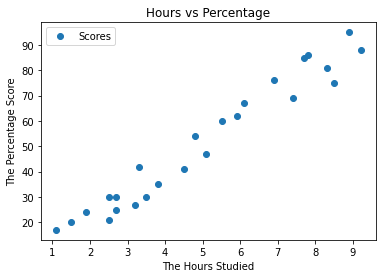

In [11]:
d.plot(x='Hours', y='Scores', style='o')    
plt.title('Hours vs Percentage')    
plt.xlabel('The Hours Studied')    
plt.ylabel('The Percentage Score')    
plt.show()

# Data Processing

In [12]:
x=d.iloc[:,:-1].values
y=d.iloc[:,1].values

# Splitting the Dataset into Training Set and Test Set

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test= train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=0)

In [15]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train , y_train) 

LinearRegression()

In [16]:
print(regressor.intercept_)
print(regressor.coef_)

2.370815382341881
[9.78856669]


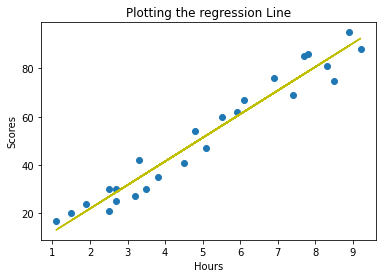

In [17]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line,'y')
plt.title("Plotting the regression Line")
plt.ylabel('Scores')
plt.xlabel('Hours')
plt.show()

From the above graph, we can see that there is a ***Positive Linear relationship*** between the ***number of hours studied*** and the ***scores obtained.*** We can say that the increase of Hours studied(x), there is an increase in the scores obatined(y)

# Predicting the Test Set result

In [18]:

y_pred = regressor.predict(x_test) # Predicting the scores
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [19]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


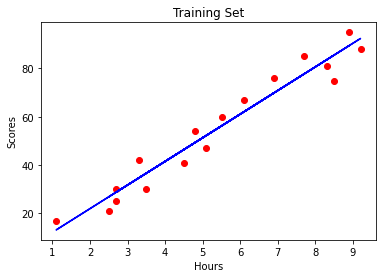

In [20]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title('Training Set')
plt.xlabel('Hours')
plt.ylabel('Scores');

# Predicted score if the student studies for 8.25 hours/day?

In [21]:
print(regressor.predict([[8.25]]))

[83.12649055]


# Evaluating the Model
The final step is to evaluate the performance of model.


In [22]:
from sklearn import metrics 
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.419727808027652
